# Import Libraries

In [174]:
import os
import random
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Loading Data

In [43]:
# Membaca file data csv
dataframe = pd.read_csv('../data/pokemon-images.csv')

# Menghapus kolom Type2
dataframe = dataframe.drop('Type2',axis=1)

# Mengurutkan data A-Z berdasar kolom Name
dataframe = dataframe.sort_values(by='Name')

# Mengatur ulang index
dataframe = dataframe.reset_index().drop('index',axis=1)

In [44]:
dataframe

,Name,Type1
0,abomasnow,Grass
1,abra,Psychic
2,absol,Dark
3,accelgor,Bug
4,aegislash-blade,Steel
...,...,...
804,zoroark,Dark
805,zorua,Dark
806,zubat,Poison
807,zweilous,Dark


In [146]:
# Mendapatkan data gambar dari direktori
imageFile = pd.Series(os.listdir('../images/'))
allName = imageFile.apply(lambda x : x[:-4])

# Checkup Data

In [147]:
# Mengurutkan data A-Z
allName = allName.sort_values()
allName = allName.reset_index().drop('index',axis=1)[0]

In [148]:
allName

0            abomasnow
1                 abra
2                absol
3             accelgor
4      aegislash-blade
            ...       
804            zoroark
805              zorua
806              zubat
807           zweilous
808         zygarde-50
Name: 0, Length: 809, dtype: object

In [149]:
dataframe['Name']

0            abomasnow
1                 abra
2                absol
3             accelgor
4      aegislash-blade
            ...       
804            zoroark
805              zorua
806              zubat
807           zweilous
808         zygarde-50
Name: Name, Length: 809, dtype: object

In [150]:
allName[530:535]

530    poochyena
531      popplio
532      porygon
533    porygon-z
534     porygon2
Name: 0, dtype: object

In [151]:
dataframe['Name'][530:535]

530    poochyena
531      popplio
532      porygon
533    porygon-z
534     porygon2
Name: Name, dtype: object

In [152]:
allName == dataframe['Name']

0      True
1      True
2      True
3      True
4      True
       ... 
804    True
805    True
806    True
807    True
808    True
Length: 809, dtype: bool

In [153]:
# Memastikan tidak ada data yang berbeda antara file gambar dengan data csv
allName[allName != dataframe['Name']]

Series([], Name: 0, dtype: object)

# Image Preprocessing

In [154]:
imageFile.head()

0          abomasnow.png
1               abra.png
2              absol.png
3           accelgor.png
4    aegislash-blade.png
dtype: object

In [155]:
# Mengubah data menjadi full path dari file gambar
imageFile = imageFile.apply(lambda x:f'../images/{x}')

In [156]:
imageFile.head()

0          ../images/abomasnow.png
1               ../images/abra.png
2              ../images/absol.png
3           ../images/accelgor.png
4    ../images/aegislash-blade.png
dtype: object

In [163]:
# Membaca setiap image menjadi numpy array dengan cv2
imageArray = np.array(list(map(lambda file:cv2.imread(file),imageFile)))

In [181]:
imageDataframe = list(zip(dataframe['Name'],imageArray))

In [182]:
# Menampilkan sample image secara random
def imgSample(count):
    for i in range(count):
        data = random.choice(imageDataframe)
        plt.imshow(data[1])
        plt.title(data[0])
        plt.show()

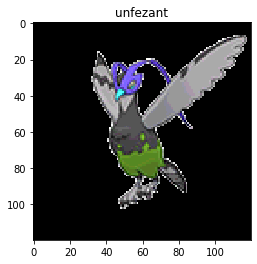

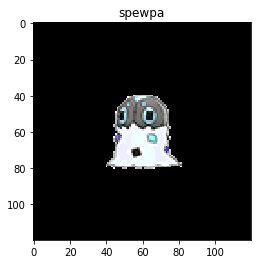

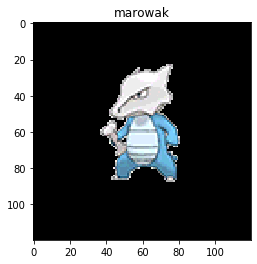

In [184]:
imgSample(3)

# Mengelompokan Berdasarkan Tipe

In [188]:
dataframe.head()

,Name,Type1
0,abomasnow,Grass
1,abra,Psychic
2,absol,Dark
3,accelgor,Bug
4,aegislash-blade,Steel


In [211]:
uniqueType = np.unique(dataframe['Type1'])

In [212]:
uniqueType

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype=object)

In [216]:
kelompok = dict()
jmlKelompok = dict()
for tipe in uniqueType:
    kelompok[tipe] = np.array(dataframe['Name'][dataframe['Type1'] == tipe])
    jmlKelompok[tipe] = len(kelompok[tipe])

In [217]:
kelompok

{'Bug': array(['accelgor', 'ariados', 'beautifly', 'beedrill', 'burmy',
        'butterfree', 'buzzwole', 'cascoon', 'caterpie', 'charjabug',
        'combee', 'crustle', 'cutiefly', 'durant', 'dustox', 'dwebble',
        'escavalier', 'forretress', 'galvantula', 'genesect', 'golisopod',
        'grubbin', 'heracross', 'illumise', 'joltik', 'kakuna',
        'karrablast', 'kricketot', 'kricketune', 'larvesta', 'leavanny',
        'ledian', 'ledyba', 'masquerain', 'metapod', 'mothim', 'nincada',
        'ninjask', 'paras', 'parasect', 'pheromosa', 'pineco', 'pinsir',
        'ribombee', 'scatterbug', 'scizor', 'scolipede', 'scyther',
        'sewaddle', 'shedinja', 'shelmet', 'shuckle', 'silcoon', 'spewpa',
        'spinarak', 'surskit', 'swadloon', 'venipede', 'venomoth',
        'venonat', 'vespiquen', 'vikavolt', 'vivillon', 'volbeat',
        'volcarona', 'weedle', 'whirlipede', 'wimpod', 'wormadam-plant',
        'wurmple', 'yanma', 'yanmega'], dtype=object),
 'Dark': array(['absol

# Analisis Data

In [218]:
jmlKelompok

{'Bug': 72,
 'Dark': 29,
 'Dragon': 27,
 'Electric': 40,
 'Fairy': 18,
 'Fighting': 29,
 'Fire': 53,
 'Flying': 3,
 'Ghost': 27,
 'Grass': 78,
 'Ground': 32,
 'Ice': 23,
 'Normal': 105,
 'Poison': 34,
 'Psychic': 53,
 'Rock': 46,
 'Steel': 26,
 'Water': 114}

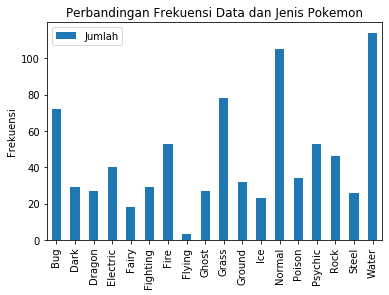

In [234]:
# Menampilkan perbandingan frekuensi data setiap jenis pokemon
pd.DataFrame(jmlKelompok,index=['Jumlah']).T.plot(kind='bar')
plt.title('Perbandingan Frekuensi Data dan Jenis Pokemon')
plt.ylabel('Frekuensi')
plt.show()

# Memindahkan Gambar
Memindahkan gambar menjadi folder sesuai dengan tipe pokemon agar dapat digunakan sebagai ImageDataGenerator dengan Keras nantinya

In [ ]:
from shutil import copyfile